# Customer Churn Prediction


<h2> Abstract </h2> 

<p> Customer churn is a metric used in measuring the rate at which customers leave their current service providers or not. In telecomunication company, insurance firms e.t.c, it is widely used. </p>
<p> This project focus on the analysis and visualization report of customer defection for a telecomunication company. A model is developed to help predict customers that are going to vountarily leave thier service providers or not before the end of next monthly subscription </p>  

<h2> Introduction </h2>

In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(style='darkgrid')


# Load data

In [2]:
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Summary

In [3]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# Data Manipulation

In [4]:
#replacing errors 
telcom.replace(' ', np.nan, inplace=True)
telcom.dropna(inplace=True)
telcom['TotalCharges'] = telcom['TotalCharges'].astype('float')

#replacing No internet with No

cols_rep = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for item in cols_rep:
    telcom[item].replace({'No internet service' : 'No'}, inplace = True)

telcom['SeniorCitizen'] = telcom['SeniorCitizen'].replace({ 0 : 'No',
                                                            1 : 'Yes'})

#Tenure to categorical column
def tenure_cat(x):
    
    if x <= 12:
        return "Tenure_0-12"
    elif x > 12 & x <= 24:
        return "Tenure_12-24"
    elif x > 24 & x <= 48:
        return "Tenure_24-48"
    elif x > 48 & x <= 60:
        return "Tenure_48-60"
    elif x > 60:
        return "Tenure_60_72"

telcom['tenure class'] = telcom['tenure'].apply(tenure_cat)

#Churn and No Churn dataframe 

Ch  = telcom[telcom['Churn'] == 'Yes']
Ch_ = telcom[telcom['Churn'] == 'No' ]

unique     = ['customerID']
all_cols   = [x for x in telcom.columns if telcom[x].nunique() < 5]
target_col = ['Churn']
cat_cols   = [x for x in all_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + unique]


# Exploration Data Analysis and Visualization

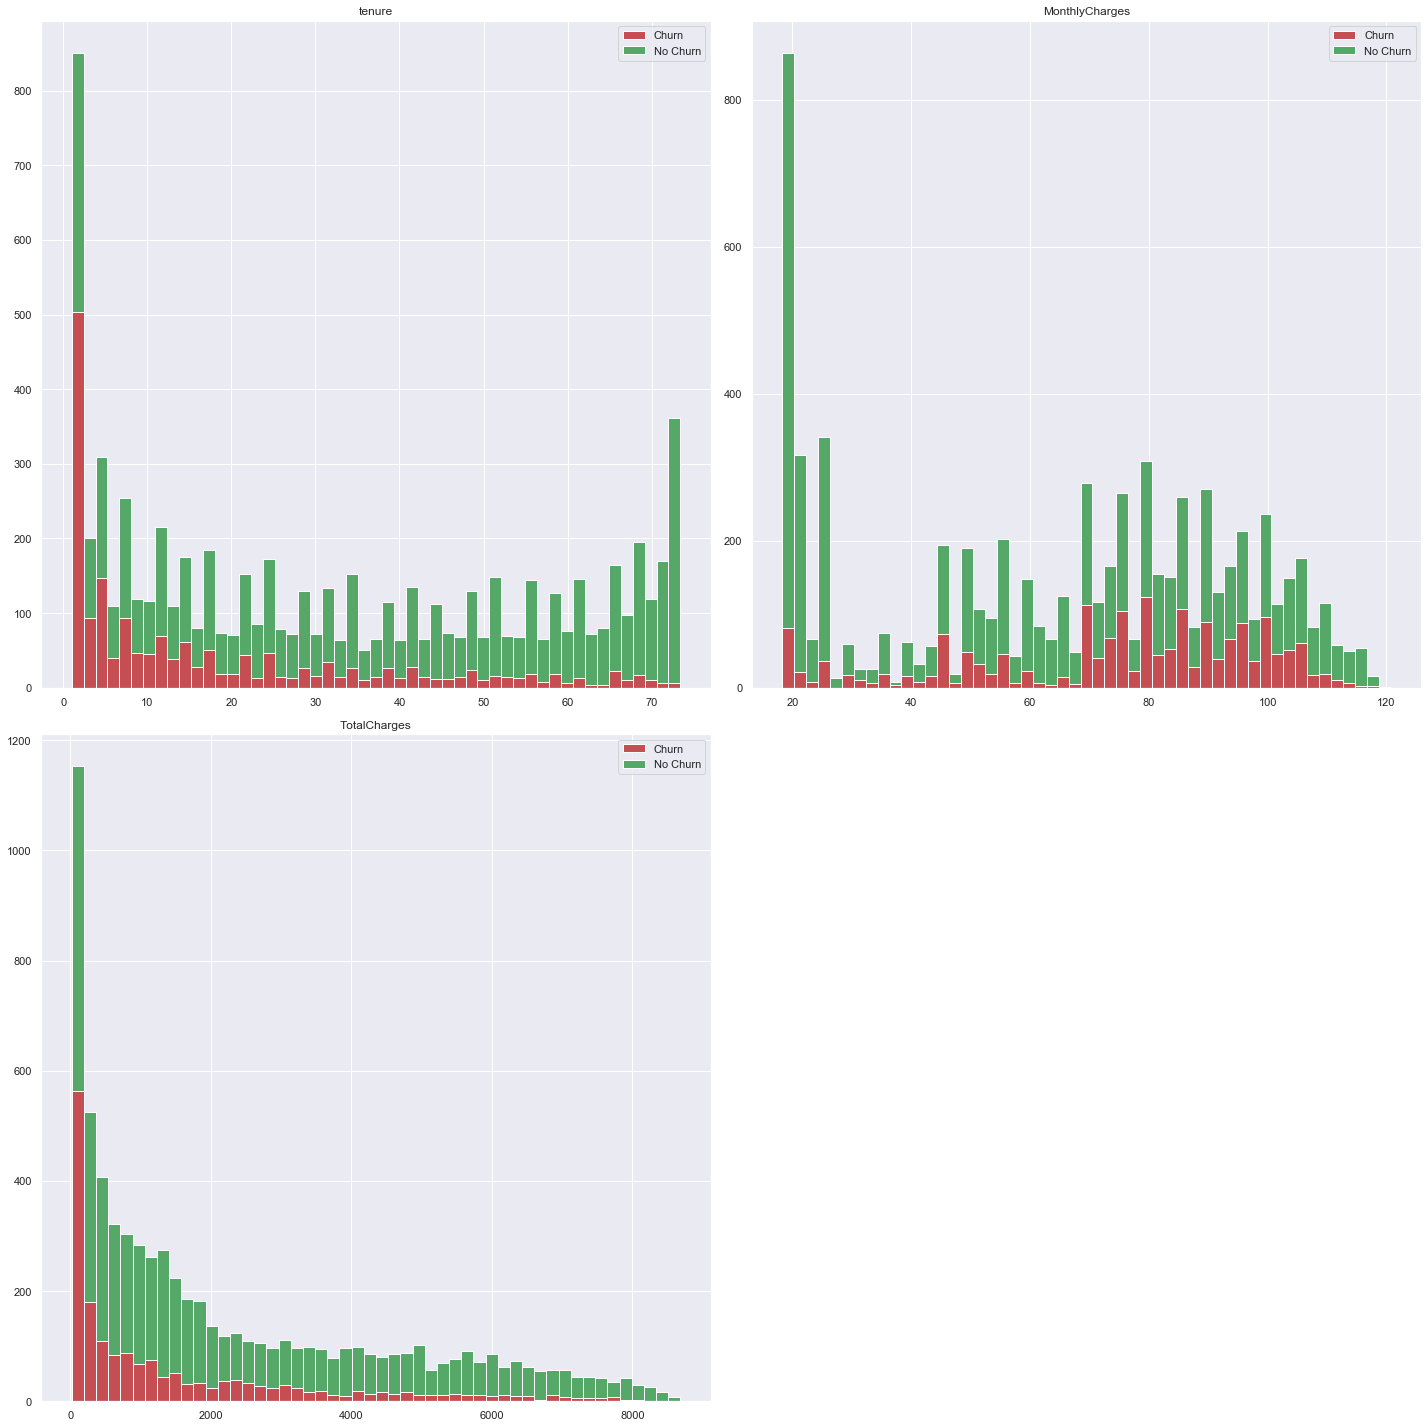

In [5]:
data = telcom
plt.figure(figsize=(20,20)) 
x = 1
for column in num_cols:
#Histogram plot of Churn and No Churn with number columns
    plt.subplot(2, 2, x)
    x += 1
    width = (max(data[column]) - min(data[column])) / 50
    plt.hist([Ch[column], Ch_[column]], bins=np.arange(min(data[column]),
                max(data[column]) + width, width), 
                stacked=True, label=['Churn', 'No Churn'], color=['r', 'g'])
    plt.legend(loc='upper right')
    plt.title(column)
plt.tight_layout()
plt.show()



In [6]:
def count_plot(column):
    fig = sns.catplot(column, data = data, col ='Churn', kind='count', hue ='gender')
    plt.show()

def tenure_plot():
    fig = sns.catplot('tenure class', hue='Churn', data=data, kind='count')
    plt.show()

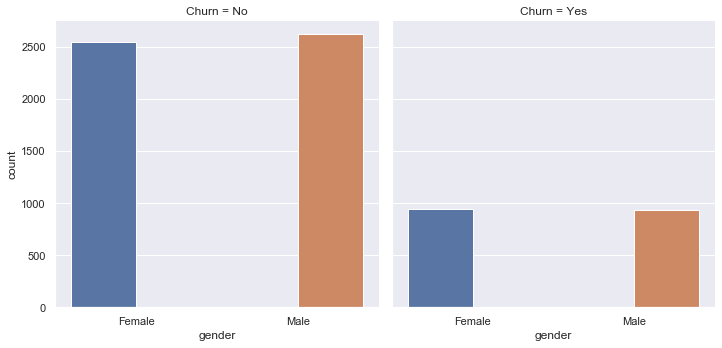

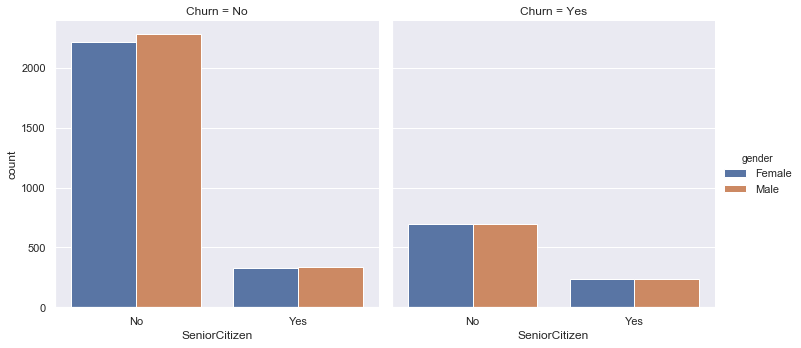

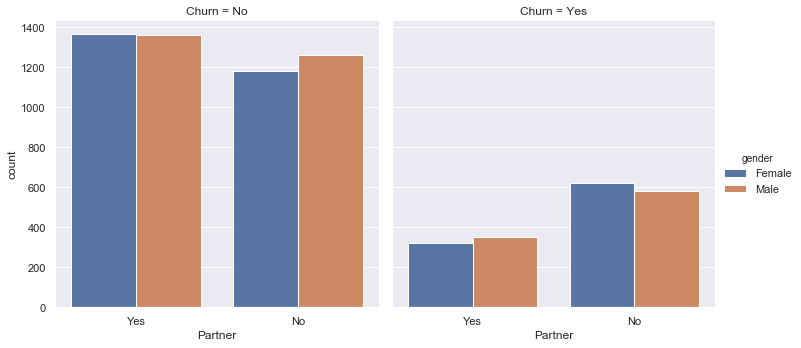

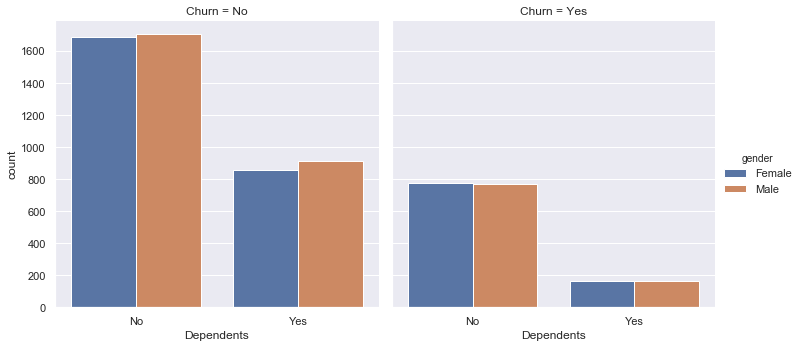

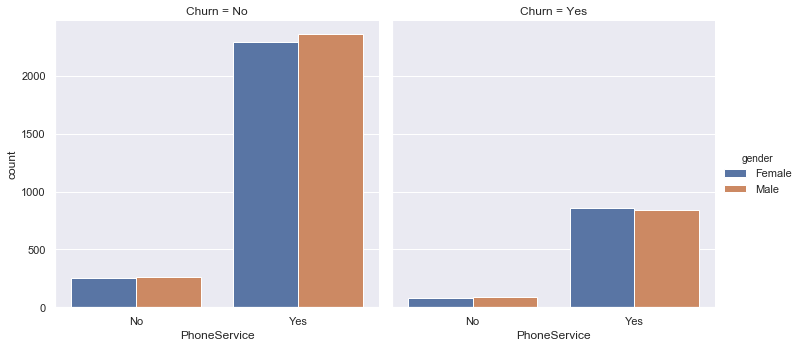

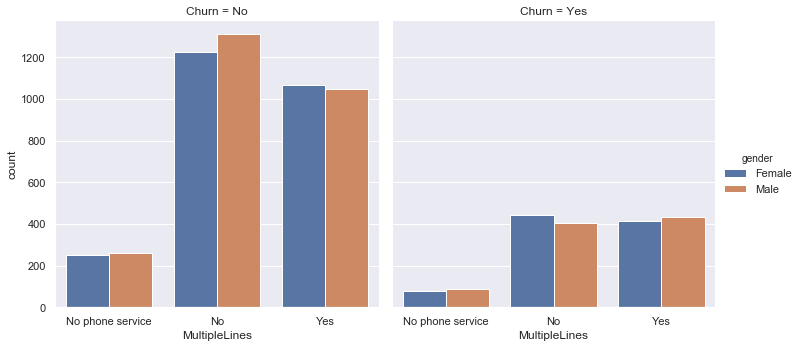

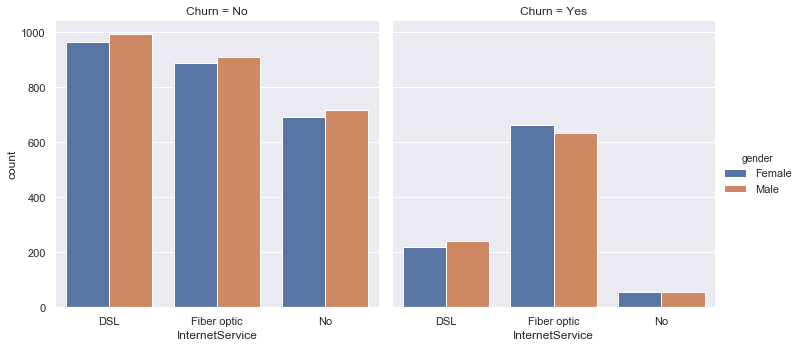

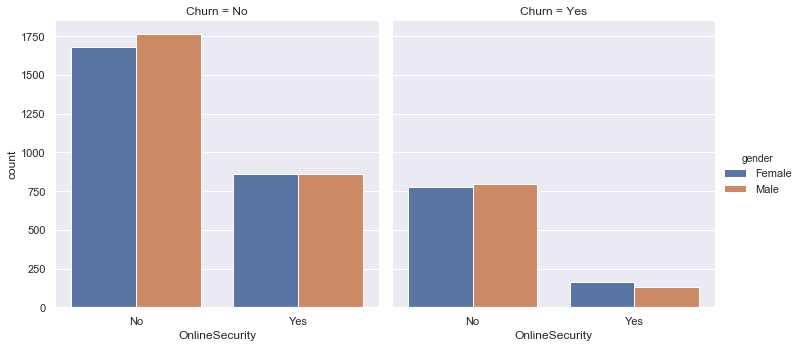

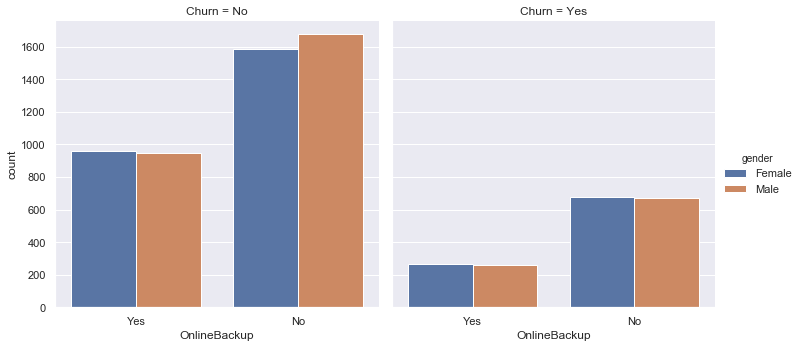

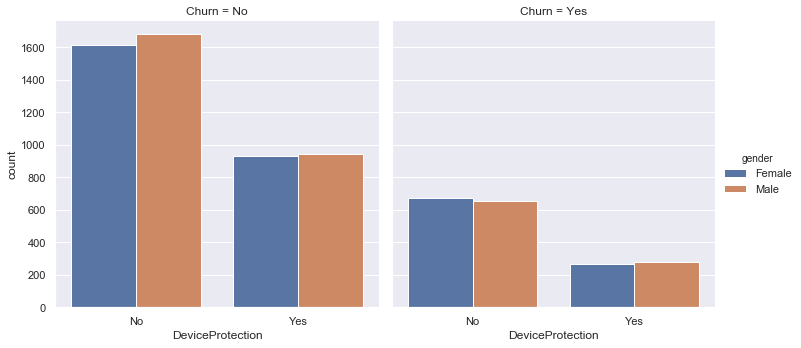

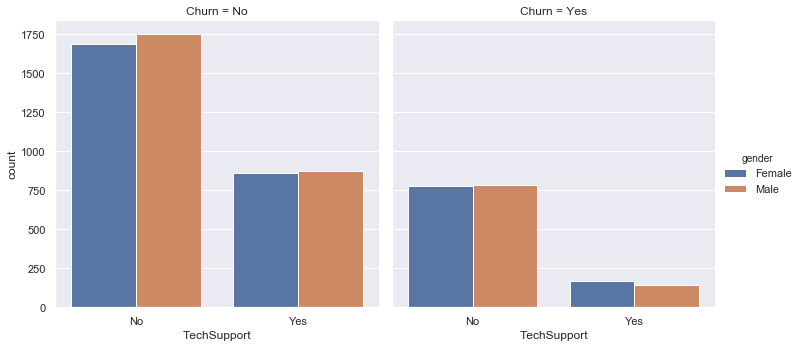

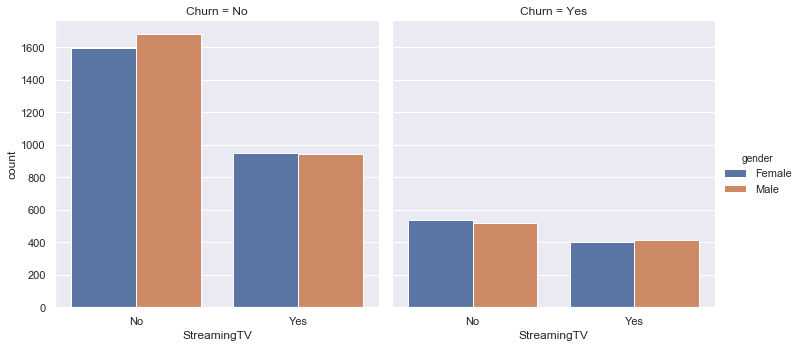

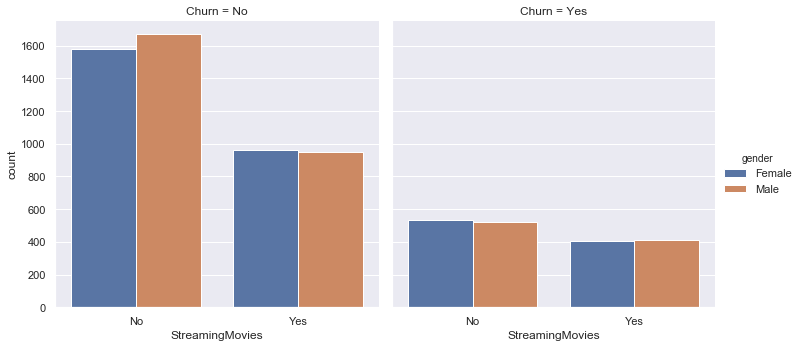

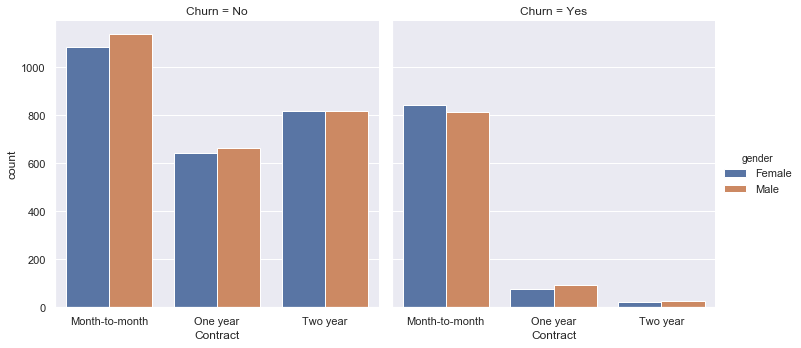

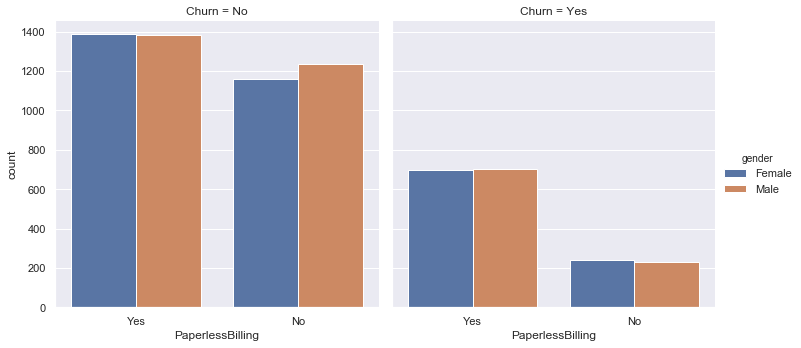

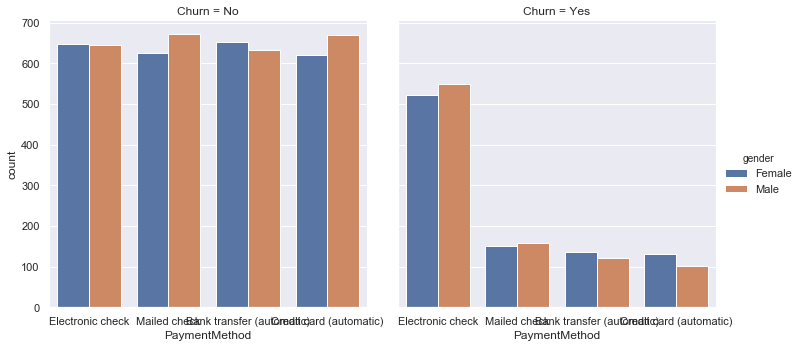

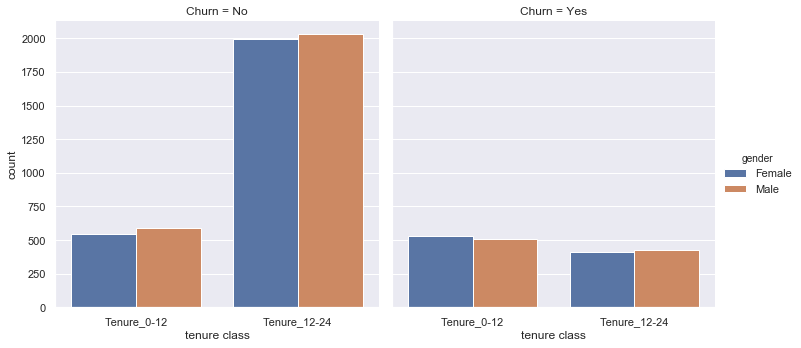

In [7]:
for i in cat_cols:
    count_plot(i)

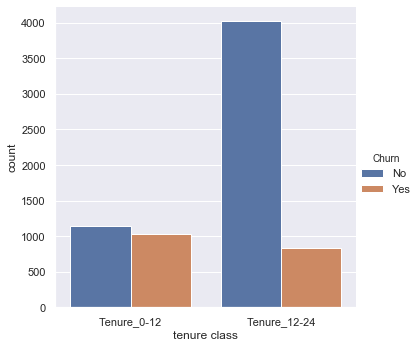

In [8]:
tenure_plot()

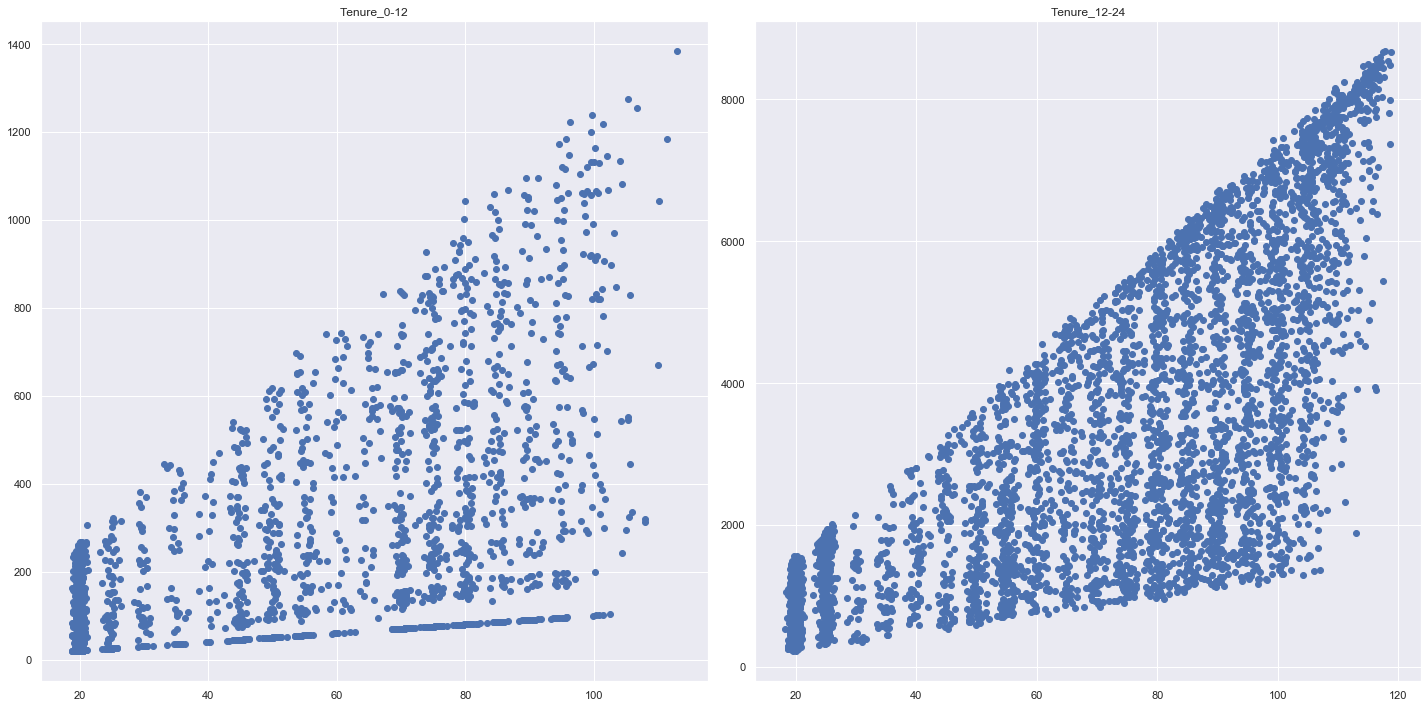

In [9]:
lis = ['Tenure_0-12', 'Tenure_12-24']
plt.figure(figsize=(20, 10))
x = 1
for num in lis:
    plt.subplot(1, 2, x)
    x += 1
    plt.scatter(telcom[telcom['tenure class'] == num]['MonthlyCharges'].reset_index(drop=True),
                telcom[telcom['tenure class'] == num]['TotalCharges'].reset_index(drop=True))
    plt.title(num)
plt.tight_layout()
plt.show()

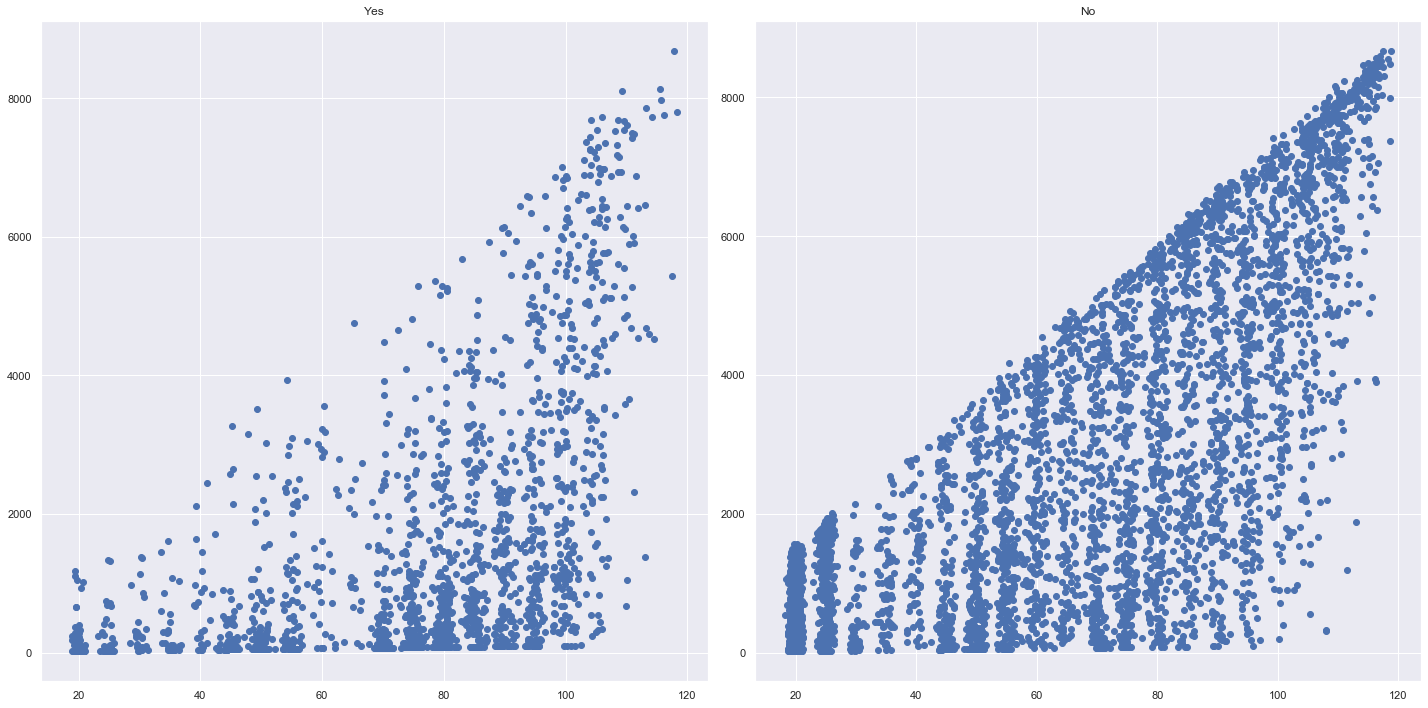

In [10]:
lis = ['Yes', 'No']
plt.figure(figsize=(20, 10))
x = 1
for churn in lis:
    plt.subplot(1, 2, x)
    x += 1
    plt.scatter(x = telcom[telcom["Churn"] == churn]["MonthlyCharges"].reset_index(drop=True),
                y = telcom[telcom["Churn"] == churn]["TotalCharges"].reset_index(drop=True))
    plt.title(churn)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns

all_cols   = [x for x in telcom.columns if telcom[x].nunique() < 6]
cat_cols   = [x for x in all_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = [x for x in cat_cols if telcom[x].nunique() < 3]
#Columns more than 2 values
multi_cols = [x for x in cat_cols if telcom[x].nunique() > 2]

#Label encoding Binary columns
for item in bin_cols:
    enc = LabelEncoder()
    telcom[item] = enc.fit_transform(telcom[item])
#Label encoding of target variable
enc_y = LabelEncoder()
telcom['Churn'] = enc_y.fit_transform(telcom['Churn'])

#Dummie values for multivalue columns
telcom  = pd.get_dummies(data = telcom, columns=multi_cols)


#Scaling Numerical columns
sc      = StandardScaler()
scaled  = sc.fit_transform(telcom[num_cols])
scaled  = pd.DataFrame(scaled, columns = num_cols)

std     = StandardScaler()
scaled  = std.fit_transform(telcom[num_cols])
scaled  = pd.DataFrame(scaled,columns=num_cols)
telcom_ = telcom.copy()
telcom  = telcom.drop(columns = num_cols, axis=1)
telcom  = telcom.merge(scaled, left_index=True,right_index=True,how = "left")
telcom.dropna(inplace=True)

In [12]:
summary = telcom_.describe().transpose().reset_index()
summary = summary.rename(columns = {'index':'feature'})
np.around(summary, 3)


feature   count      mean       std  \
0                                    gender  7032.0     0.505     0.500   
1                             SeniorCitizen  7032.0     0.162     0.369   
2                                   Partner  7032.0     0.483     0.500   
3                                Dependents  7032.0     0.298     0.458   
4                                    tenure  7032.0    32.422    24.545   
5                              PhoneService  7032.0     0.903     0.296   
6                            OnlineSecurity  7032.0     0.287     0.452   
7                              OnlineBackup  7032.0     0.345     0.475   
8                          DeviceProtection  7032.0     0.344     0.475   
9                               TechSupport  7032.0     0.290     0.454   
10                              StreamingTV  7032.0     0.384     0.486   
11                          StreamingMovies  7032.0     0.388     0.487   
12                         PaperlessBilling  7032.0     0.593     0.491   
13                           MonthlyCharges  7032.0    64.798    30.086   
14                             TotalCharges  7032.0  2283.300  2266.771   
15                                    Churn  7032.0     0.266     0.442   
16                             tenure class  7032.0     0.691     0.462   
17                         MultipleLines_No  7032.0     0.481     0.500   
18           MultipleLines_No phone service  7032.0     0.097     0.296   
19                        MultipleLines_Yes  7032.0     0.422     0.494   
20                      InternetService_DSL  7032.0     0.344     0.475   
21              InternetService_Fiber optic  7032.0     0.440     0.496   
22                       InternetService_No  7032.0     0.216     0.412   
23                  Contract_Month-to-month  7032.0     0.551     0.497   
24                        Contract_One year  7032.0     0.209     0.407   
25                        Contract_Two year  7032.0     0.240     0.427   
26  PaymentMethod_Bank transfer (automatic)  7032.0     0.219     0.414   
27    PaymentMethod_Credit card (automatic)  7032.0     0.216     0.412   
28           PaymentMethod_Electronic check  7032.0     0.336     0.472   
29               PaymentMethod_Mailed check  7032.0     0.228     0.420   

      min      25%       50%       75%      max  
0    0.00    0.000     1.000     1.000     1.00  
1    0.00    0.000     0.000     0.000     1.00  
2    0.00    0.000     0.000     1.000     1.00  
3    0.00    0.000     0.000     1.000     1.00  
4    1.00    9.000    29.000    55.000    72.00  
5    0.00    1.000     1.000     1.000     1.00  
6    0.00    0.000     0.000     1.000     1.00  
7    0.00    0.000     0.000     1.000     1.00  
8    0.00    0.000     0.000     1.000     1.00  
9    0.00    0.000     0.000     1.000     1.00  
10   0.00    0.000     0.000     1.000     1.00  
11   0.00    0.000     0.000     1.000     1.00  
12   0.00    0.000     1.000     1.000     1.00  
13  18.25   35.588    70.350    89.862   118.75  
14  18.80  401.450  1397.475  3794.738  8684.80  
15   0.00    0.000     0.000     1.000     1.00  
16   0.00    0.000     1.000     1.000     1.00  
17   0.00    0.000     0.000     1.000     1.00  
18   0.00    0.000     0.000     0.000     1.00  
19   0.00    0.000     0.000     1.000     1.00  
20   0.00    0.000     0.000     1.000     1.00  
21   0.00    0.000     0.000     1.000     1.00  
22   0.00    0.000     0.000     0.000     1.00  
23   0.00    0.000     1.000     1.000     1.00  
24   0.00    0.000     0.000     0.000     1.00  
25   0.00    0.000     0.000     0.000     1.00  
26   0.00    0.000     0.000     0.000     1.00  
27   0.00    0.000     0.000     0.000     1.00  
28   0.00    0.000     0.000     1.000     1.00  
29   0.00    0.000     0.000     0.000     1.00

# Correlation Plot

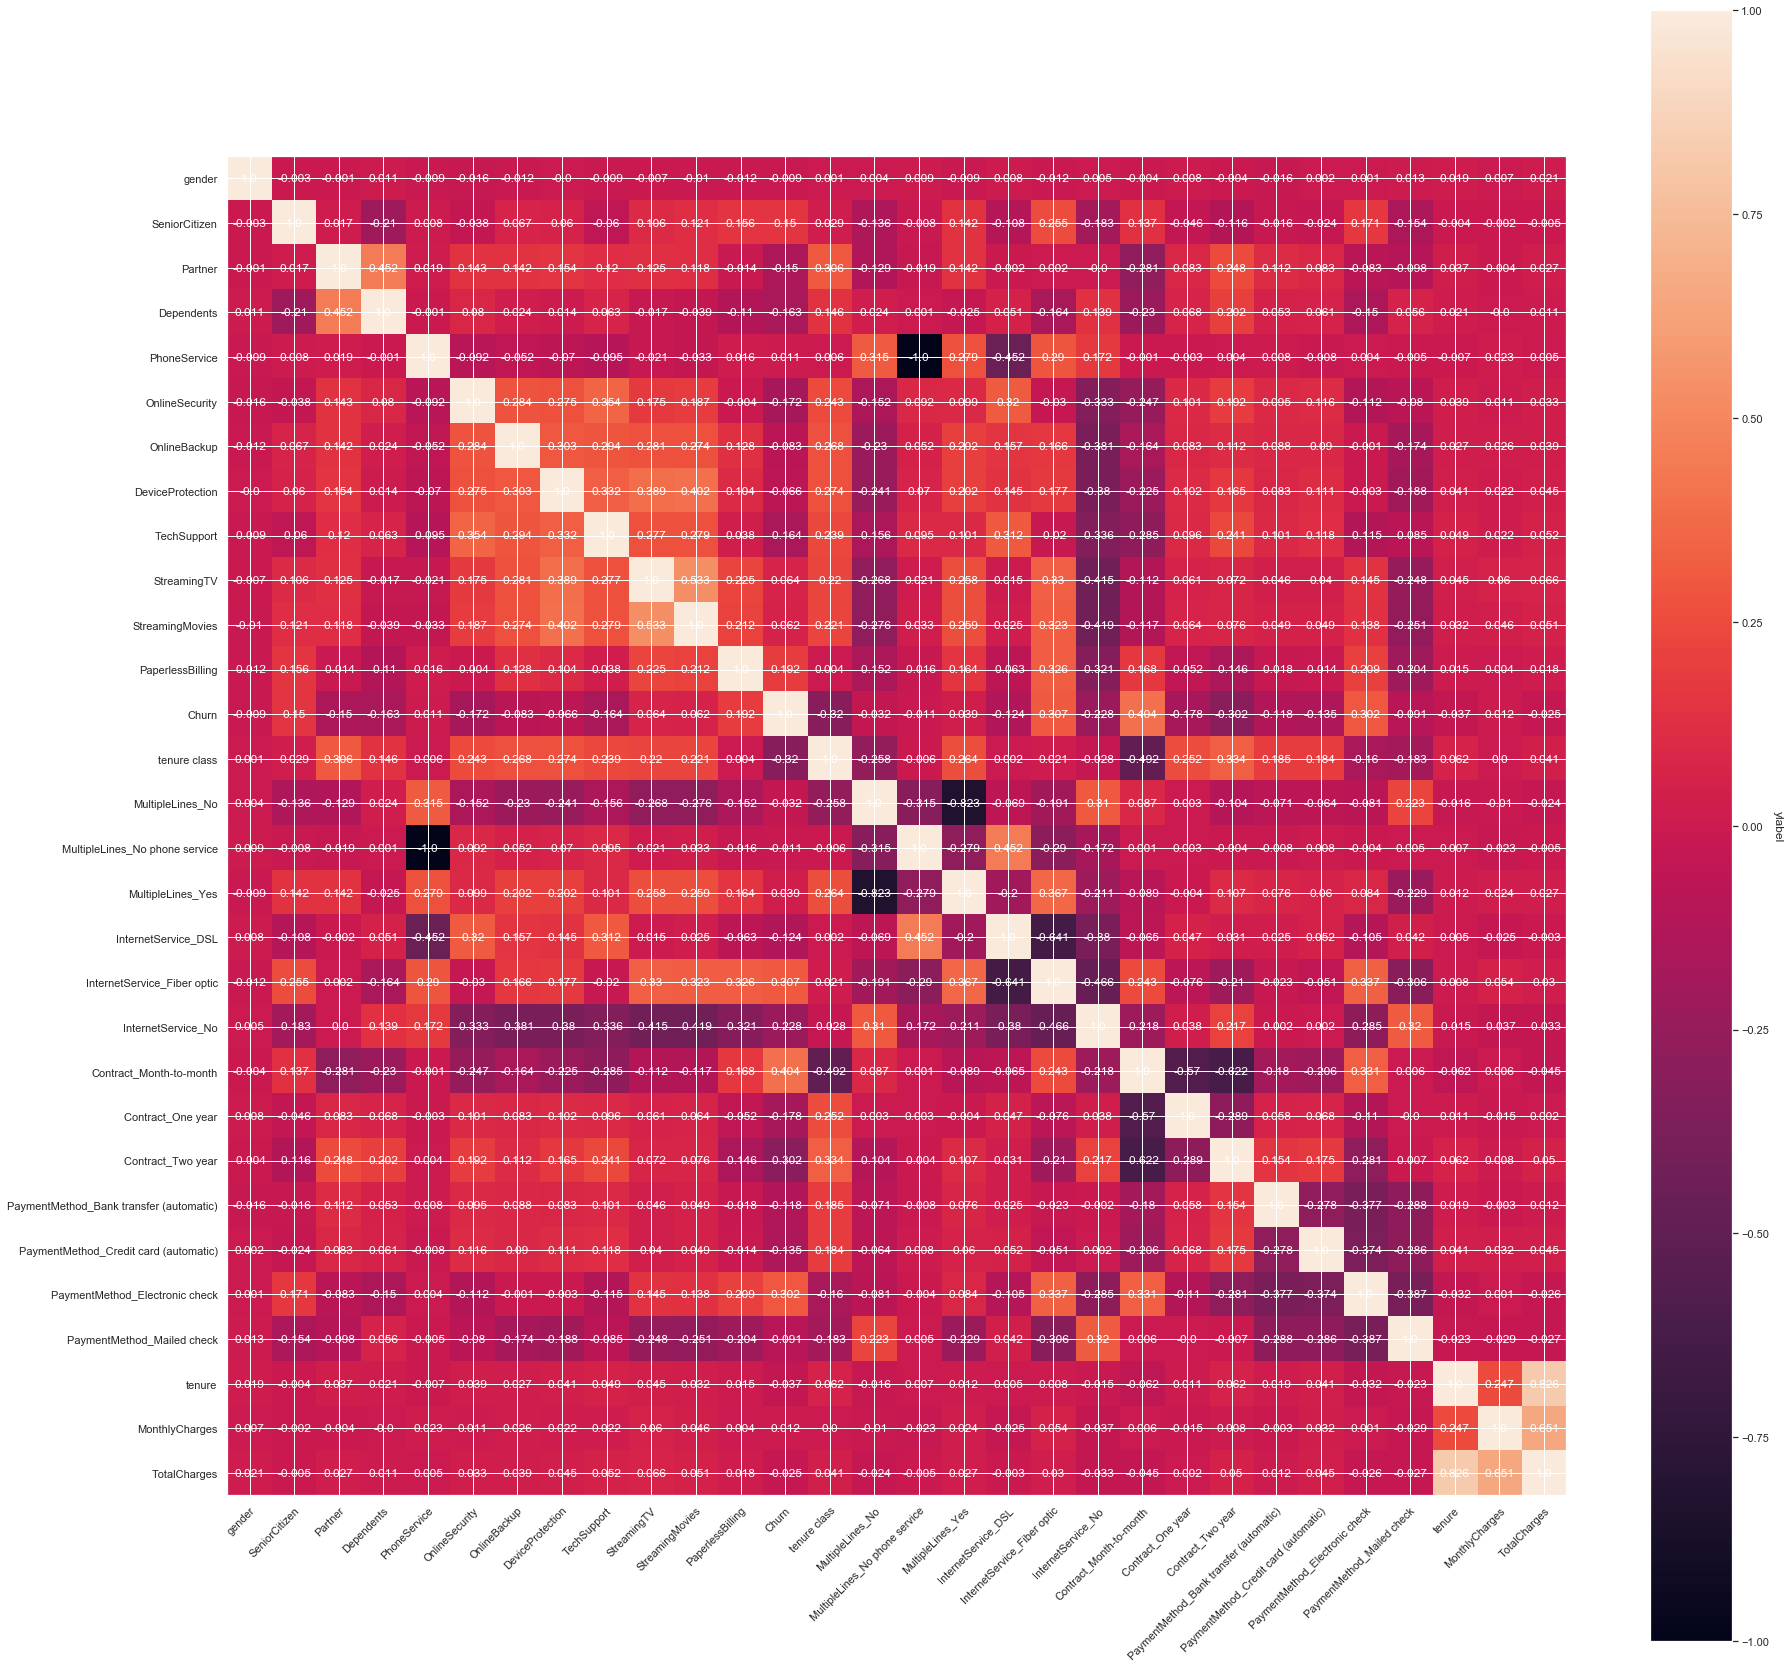

In [13]:
corre = telcom.corr()
data_lab = corre.columns.tolist()
data = np.array(corre)
data = np.around(data, 3)

fig, ax = plt.subplots(figsize=(30,30))
im = ax.imshow(data)
#Showing all the ticks
ax.set_xticks(np.arange(len(data_lab)))
ax.set_yticks(np.arange(len(data_lab)))

#Setting the label with respective list of enteries
ax.set_xticklabels(data_lab)
ax.set_yticklabels(data_lab) 

#Reorientating xtick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor' )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('ylabel', rotation=-90, va="bottom")
for i in range(len(data_lab)):
    for j in range(len(data_lab)):
        text = ax.text(j, i, data[i, j],
                      ha="center", va="center", color="w")     
plt.show()

# Model Building

In [14]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

<h3> Model function </h3>

In [15]:
def  modelClassiflierFunc(X, y, r_s, mod, ls_cols, size, cf):
    #splitting train test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=r_s)
    #fitting train dataset 
    mod.fit(X_train, y_train)
    #prediction
    ypred = mod.predict(X_test)

    if cf == 'coefficient':
        coefficients  = pd.DataFrame(mod.coef_.ravel())
    elif cf == 'importance':
        coefficients  = pd.DataFrame(mod.feature_importances_)
    
    coef_df = pd.DataFrame(ls_cols)
    coef_sumry    = (pd.merge(coefficients, coef_df, left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    print (mod)
    print ("\n Classification report : \n",classification_report(y_test,ypred))
    print ("Accuracy   Score : ",accuracy_score(y_test,ypred))
    print ("F1   Score : ", f1_score(y_test,ypred))
    plt.figure(figsize=(20,10))
    chart = sns.barplot(x=coef_sumry['features'], y=coef_sumry['coefficients'], palette='Set1')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()





In [16]:
_id    = ['customerID']
y_list = ['Churn']
all_list = list(telcom.columns)
ls_cols  = [x for x in all_list if x not in y_list + _id]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1564
           1       0.69      0.53      0.60       543

    accuracy                           0.82      2107
   macro avg       0.77      0.72      0.74      2107
weighted avg       0.81      0.82      0.81      2107

Accuracy   Score :  0.8168011390602753
F1   Score :  0.5987525987525987


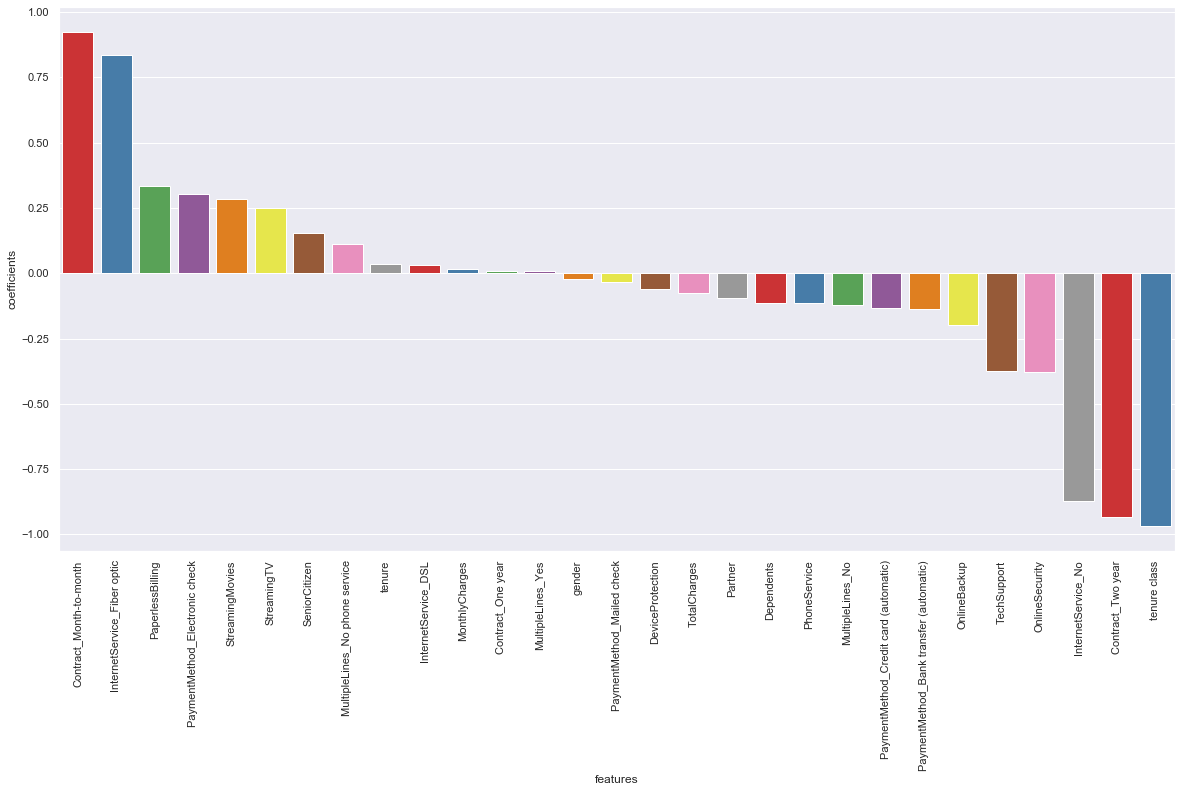

In [22]:
modelClassiflierFunc(telcom[ls_cols].values, telcom['Churn'].values, 994, log_, ls_cols, 0.3, 'coefficient' )

In [23]:
log_ = LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1564
           1       0.69      0.53      0.60       543

    accuracy                           0.82      2107
   macro avg       0.77      0.72      0.74      2107
weighted avg       0.81      0.82      0.81      2107

Accuracy   Score :  0.8168011390602753
F1   Score :  0.5987525987525987


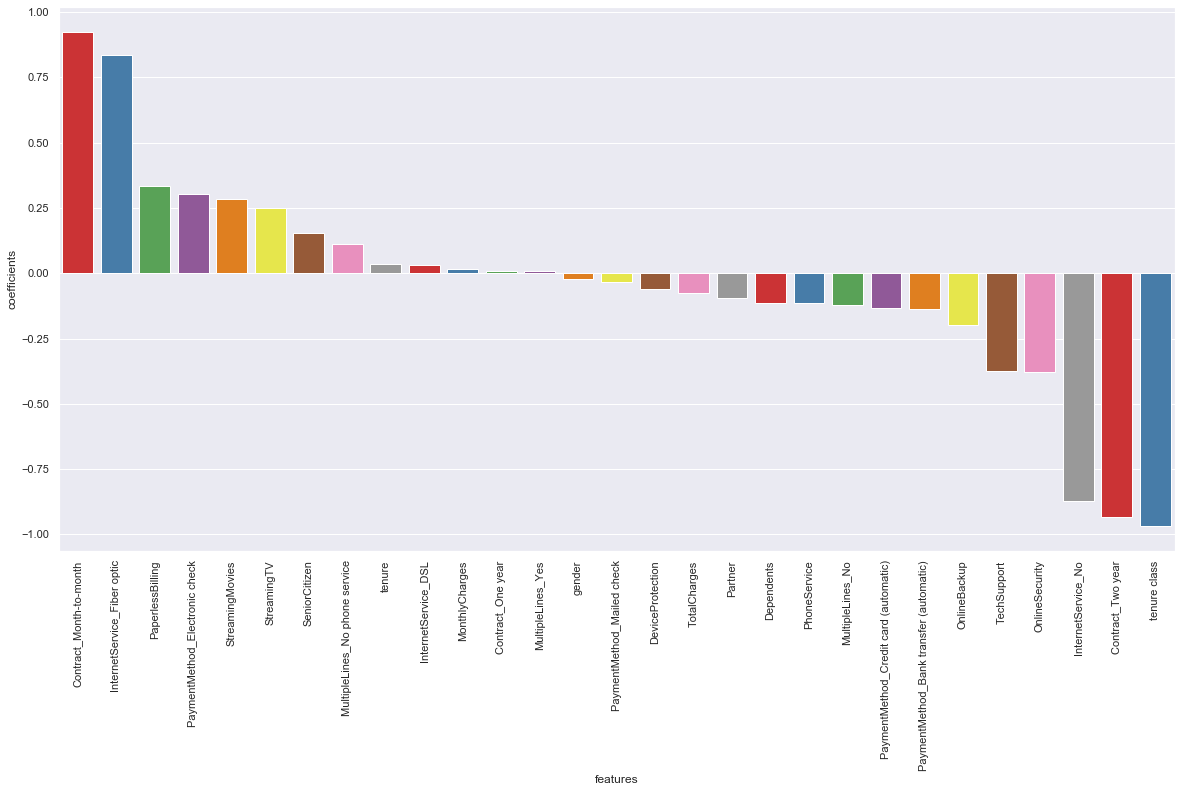

In [24]:
modelClassiflierFunc(telcom[ls_cols].values, telcom['Churn'].values, 994, log_, ls_cols, 0.3, 'coefficient' )

In [25]:
rand_ = RandomForestClassifier(random_state=55)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1607
           1       0.58      0.49      0.53       500

    accuracy                           0.79      2107
   macro avg       0.71      0.69      0.70      2107
weighted avg       0.78      0.79      0.79      2107

Accuracy   Score :  0.7944945420028476
F1   Score :  0.5318918918918919


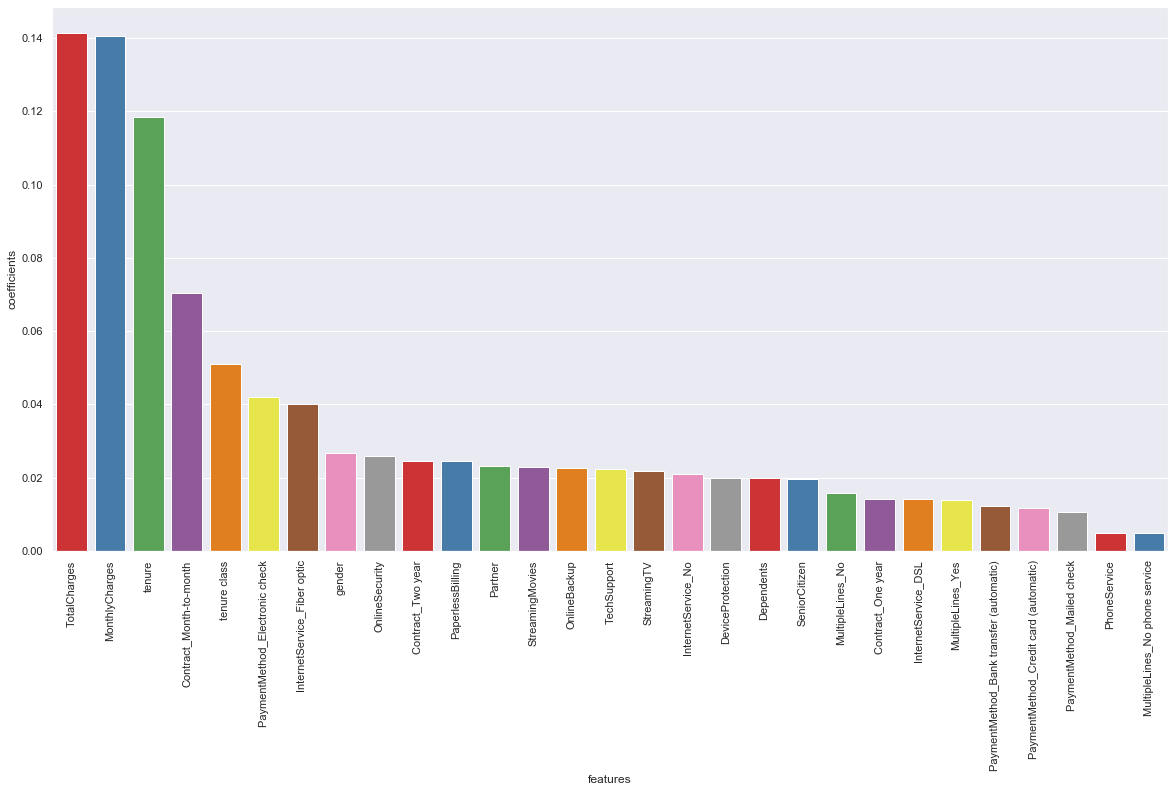

In [26]:
modelClassiflierFunc(telcom[ls_cols].values, telcom['Churn'].values, 55, rand_, ls_cols, 0.3, 'importance' )

# Conclusion

<pAfter training the data using a random forest and logistic regression model, the logistic regression model has surpassed the random forest with also a better f1 score than the random forest </p>